# 🎓 **Taller 4.4: Taller de Métodos de clustering basados en particiones Parte 3**


## OBJETIVOS DEL TALLER:
En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones como el K-medoids.

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [2]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

def cargar_dataset_csv(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_csv(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


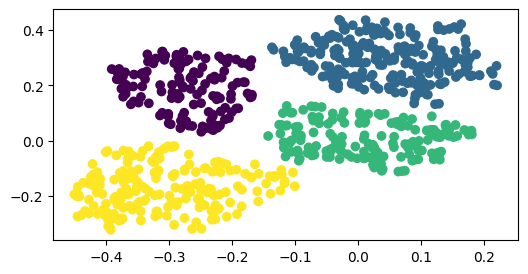

In [3]:
# Cargar dataset
D =cargar_dataset_csv("dataset_cuatro_separables_peque.csv")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

# 🎯 **:Cree el algoritmo K-medoids que tiene un único parámetro: el número de clústeres (K).**

In [13]:

# PASO 1 elejir los medoides iniciales de forma randomica
def paso1_elije_medoides(K, Dx):
  # Elegimos los centros iniciales entre el conjunto de datos
  cDx =  Dx[np.random.choice(Dx.shape[0], K, replace=False)] ## P1. Tu código aquí ##
  return cDx


Los centros iniciales elegidos aleatoriamente son:
[[-0.277239  0.320511]
 [-0.224858 -0.249966]
 [ 0.110941  0.166095]
 [-0.201493  0.167911]]


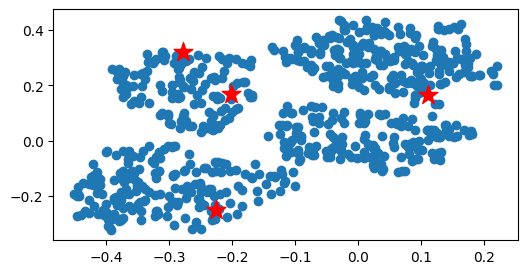

In [26]:
print('Los centros iniciales elegidos aleatoriamente son:')
K=4
cDx = paso1_elije_medoides(K, Dx)
print(cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de asignación de datos
En este paso, cada elemento de nuestro dataset se asigna al medoide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

In [29]:
# Definimos la distancia euclidiana de una instancia x
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

def distancia_euclidiana(x, y):
    return np.sqrt(np.sum((x-y)**2))

def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
    return mD

def paso2_asigna_puntos(Dx, cDx):
    Dyp = np.zeros(Dx.shape[0])
    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
        # a cada centro existente en cDx. Podemos utilizar para ello la función
        # distancia_euclidiana_grupo.

        distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i,:] ,cDx)

        # Una vez calculada la distancia, necesitamos averiguar el índice de
        # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
        pred_y = np.argmin(distancia_punto_a_centros)
        Dyp[i] = pred_y
    return Dyp

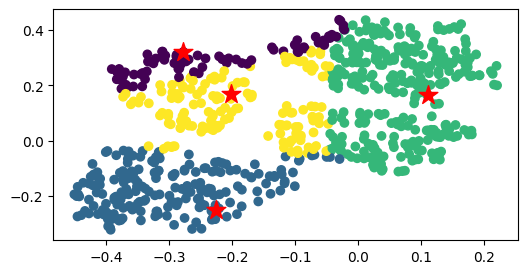

In [30]:
DyM = paso2_asigna_puntos(Dx, cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de actualización del medoide

In [31]:
def paso3_actualiza_medoides(Dx, cDx, Dyp, K):
  cDx_ant = cDx.copy()
  # Calcular los nuevos centros
  for k in range(K):
      # En este caso lo que buscamos es el elemento del cluster que reduce la
      # distancia con respecto a todos los demás elementos. Para ello, calculamos
      # las distancias entre todos los elementos del cluster `k` y las almacenamos
      # en `mat`.

      # Primero, obtenemos un vector binario indicando qué elementos de Dyp pertenecen a k
      indices_elementos_k = (Dyp == k) ## P3. Tu código aquí ##

      puntos_k = Dx[indices_elementos_k]

      # Si el cluster está vacío, no actualizamos
      if len(puntos_k) == 0:
            continue

      # Luego calculamos las distancias entre cada uno de los elementos de `Dx`
      # que nuestra predicción dice que pertenecen al custer `k` y los demás.
      mat = np.linalg.norm(
            puntos_k[:, np.newaxis, :] - puntos_k[np.newaxis, :, :],
            axis=2
      )

      # Ahora buscamos el elemento con menor distancia dentro del
      # cluster `k` y nos quedamos con su índice (usando np.argmin, que busca
      # el mínimo de un vector y nos devuelve su índice).

      ic =np.where(Dyp==k)[0][np.argmin(np.sum(mat, axis=1))]

      # Asignamos como centro del cluster al elemento del cluster que ofrece
      # la menor distancia con respecto a todos los demás
      cDx[k,:] =   Dx[ic] ## P5. Tu código aquí ##
  return cDx

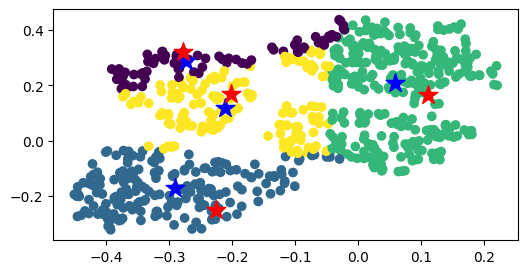

In [32]:
cDx_ant = cDx.copy()
cDx =paso3_actualiza_medoides(Dx, cDx, DyM, K)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='b')
ax.scatter(cDx_ant[:,0],cDx_ant[:,1], marker='*', s=200, c='r')

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

In [33]:
def MyKMedoide(Dx, K):
  cDx = paso1_elije_medoides(K , Dx)  ## P6. Tu código aquí ##
  # Flag de convergencia
  iterando = True
  Dyp = np.zeros(Dx.shape[0])
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    Dyp =paso2_asigna_puntos(Dx,cDx_ant) ## P7. Tu código aquí ##
    # Calcular los nuevos centros
    cDx = paso3_actualiza_medoides(Dx,cDx_ant,Dyp , K ) ## P8. Tu código aquí ##
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp

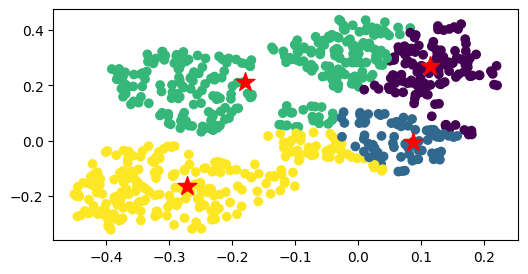

In [34]:
cDx, Dyp = MyKMedoide(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 3: COMPARA KMEDOIDS CON KMEANS++**


K-Means++:


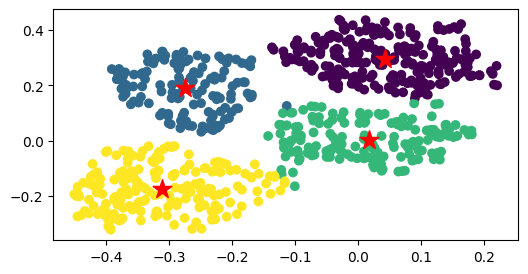

In [35]:
from sklearn.cluster import KMeans

modelo = KMeans(4)
modelo.fit(Dx)
modelo.predict(Dx)
Dyp_sk =  modelo.predict(Dx)## P9.1 Tu código aquí ##
# Obtener los centros de los clústeres
cDx_sk =modelo.cluster_centers_ ## P9.2 Tu código aquí ##

print('K-Means++:')
# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk)
ax.scatter(cDx_sk[:,0],cDx_sk[:,1], marker='*', s=200, c='r')

### Calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

In [37]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil_kmed = silhouette_score(Dx, Dyp)
ch_kmed = calinski_harabasz_score(Dx, Dyp)
db_kmed = davies_bouldin_score(Dx, Dyp)

sil_kmeans = silhouette_score(Dx, Dyp_sk)
ch_kmeans = calinski_harabasz_score(Dx, Dyp_sk)
db_kmeans = davies_bouldin_score(Dx, Dyp_sk)

print("MÉTRICAS DE EVALUACIÓN\n")

print("K-Medoids")
print(f"Silhouette: {sil_kmed:.4f}")
print(f"Calinski-Harabasz: {ch_kmed:.4f}")
print(f"Davies-Bouldin: {db_kmed:.4f}\n")

print("K-Means++")
print(f"Silhouette: {sil_kmeans:.4f}")
print(f"Calinski-Harabasz: {ch_kmeans:.4f}")
print(f"Davies-Bouldin: {db_kmeans:.4f}")


📊 MÉTRICAS DE EVALUACIÓN

K-Medoids
Silhouette: 0.3185
Calinski-Harabasz: 612.7470
Davies-Bouldin: 0.8228

K-Means++
Silhouette: 0.5362
Calinski-Harabasz: 1346.0006
Davies-Bouldin: 0.6266


En el dataset, caracterizado por clústeres bien separados y de densidad similar, K-Means++ obtiene un mejor desempeño que K-Medoids en todas las métricas evaluadas, ya que presenta valores más altos de Silhouette y Calinski-Harabasz, junto con un menor índice de Davies-Bouldin, lo que indica la formación de clústeres más compactos y claramente diferenciados este comportamiento se explica porque K-Means++ optimiza la varianza intra-clúster y resulta especialmente efectivo cuando los datos poseen estructuras aproximadamente esféricas y no presentan outliers significativos

### ahora prueba con otro dataset, calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

✅ Dataset cargado desde URL GitHub


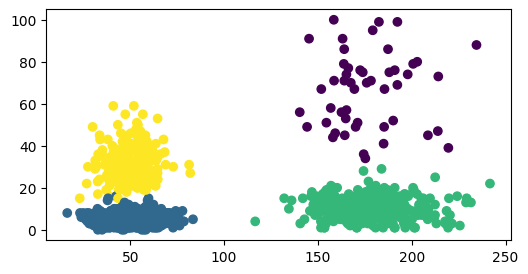

In [42]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_diferente_densidad.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

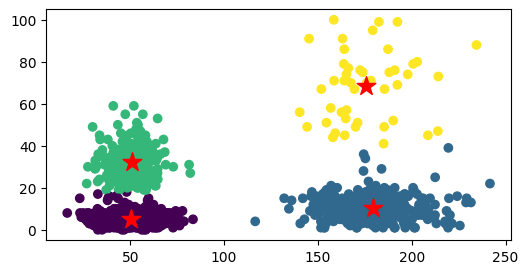

In [43]:
modelo = KMeans(n_clusters=4, random_state=0)
Dyp_kmeans2 = modelo.fit_predict(Dx)
cDx_kmeans2 = modelo.cluster_centers_

fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0], Dx[:,1], c=Dyp_kmeans2)
ax.scatter(cDx_kmeans2[:,0], cDx_kmeans2[:,1], marker='*', s=200, c='r')


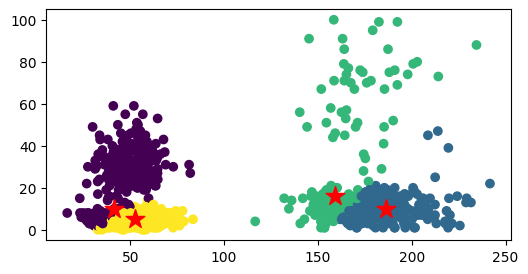

In [49]:
cDx_kmed2, Dyp_kmed2 = MyKMedoide(Dx, 4)

fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0], Dx[:,1], c=Dyp_kmed2)
ax.scatter(cDx_kmed2[:,0], cDx_kmed2[:,1], marker='*', s=200, c='r')

In [51]:
print("MÉTRICAS – DATASET DIFERENTE DENSIDAD\n")

print("K-Medoids")
print("Silhouette:", silhouette_score(Dx, Dyp_kmed2))
print("Calinski-Harabasz:", calinski_harabasz_score(Dx, Dyp_kmed2))
print("Davies-Bouldin:", davies_bouldin_score(Dx, Dyp_kmed2), "\n")

print("K-Means++")
print("Silhouette:", silhouette_score(Dx, Dyp_kmeans2))
print("Calinski-Harabasz:", calinski_harabasz_score(Dx, Dyp_kmeans2))
print("Davies-Bouldin:", davies_bouldin_score(Dx, Dyp_kmeans2))

MÉTRICAS – DATASET DIFERENTE DENSIDAD

K-Medoids
Silhouette: 0.4128896824304305
Calinski-Harabasz: 8379.310133324556
Davies-Bouldin: 1.3506810869545978 

K-Means++
Silhouette: 0.5900131037332426
Calinski-Harabasz: 10596.232506708026
Davies-Bouldin: 0.71038639858428


En el dataset con clústeres de diferente densidad, K-Means++ también presenta un mejor desempeño que K-Medoids, al obtener un Silhouette más alto (0.59 frente a 0.41), un índice Calinski-Harabasz superior (10596.23 frente a 8379.31) y un valor significativamente menor de Davies-Bouldin (0.71 frente a 1.35), lo que indica clústeres más compactos, mejor separados y con menor solapamiento en este caso, la estructura de los datos favorece a K-Means++, ya que los grupos, aunque con distinta densidad, mantienen formas relativamente definidas que permiten una correcta optimización de la varianza intra-clúster.

# 🚀 ¡TALLER FINALIZADO!"